In [33]:
import os
import re
import numpy as np
import json
from random import shuffle
from PIL import Image
import matplotlib.pyplot as plt

label = json.load(open('D://CISC351//Group_Project_Data//CCRCC.json','r'))

In [34]:
f = open("cohort.csv","r")
all_dict = {} # id: subcategory
allFiles = f.read()
allFiles = allFiles.split('\n')
allFiles.pop(0)

'"_id","Case_ID","Specimen_ID","Slide_ID","Tumor","Topographic_Site","Specimen_Type","Weight","Tumor_Site","Pathology","Tumor_Histological_Type","Tumor_Segment_Acceptable","Percent_Tumor_Nuclei","Percent_Total_Cellularity","Percent_Necrosis","Normal Segment Free of Tumor","HasRadiology","Radiology","Genomics","Proteomics","Genomics_Available","GDC Link","Proteomics_Available","PDC Link","Gender","Age","Vital status at 12months follow up","Vital status at 24months follow up","Ethnicity","Race","Fully Qualified"'

In [35]:
for i in range(len(allFiles)):
    allFiles[i] = allFiles[i].split(',')
    all_dict[allFiles[i][3]] = allFiles[i][6]

In [36]:
imgDir = os.listdir(".//CCRCC_JPEG")

r = re.compile(".*dzi")

newlist = list(filter(r.match,imgDir))
for d in newlist:
    imgDir.remove(d)

print(len(imgDir))

782


In [104]:
def crop(input):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    
    box = (224, 224, 288, 288)
    a = im.crop(box)
    #o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
    return a       

def load_training_data():
    train_data = []
    
    for j in range(len(imgDir)):
        
    #for j in range(0, 5):
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']=="\"normal_tissue\""):
            label = np.array([1,0])
        
        else:
            label = np.array([0,1])
                
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0")[0:10]:
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            
            #img = Image.open(path)
            img = crop(path)
            train_data.append([np.array(img), label])
            
    
    shuffle(train_data)
    return train_data

In [123]:
def load_test_data():
    train_data = []
    
    for j in range(len(imgDir)):
        if (all_dict['"'+imgDir[j].replace('_files','')+'"']=="\"normal_tissue\""):
            label = np.array([1,0])
        
        else:
            label = np.array([0,1])
                
        for img in os.listdir(".//CCRCC_JPEG//"+imgDir[j]+"//20.0")[10:15]:
            path = os.path.join(".\\CCRCC_JPEG\\"+imgDir[j]+"\\20.0", img)
            
            #img = Image.open(path)
            img = crop(path)
            train_data.append([np.array(img), label])
    
    shuffle(train_data)
    return train_data

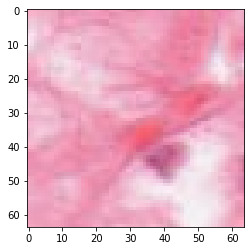

In [132]:
# function creates tensors that are too large for memory. Need to figure out another way to build the tensors. Number of images per directory found in the next cell.
im = load_training_data()
plt.imshow(im[0][0])

In [106]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization

model = Sequential()

In [107]:
img_height = 64
img_width = 64

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [133]:
trainImages = np.array([i[0] for i in im]).reshape(-1, img_height, img_width, 3)
trainLabels = np.array([i[1] for i in im],dtype = "object")
print(testImages.shape)

(7540, 64, 64, 3)


In [134]:
trainImages = np.asarray(trainImages).astype(np.int)
trainLabels = np.asarray(trainLabels).astype(np.int)

In [135]:
print(sum(trainLabels))

[2385 5155]


In [137]:
print(len(trainLabels))

7540


In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [113]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 5, verbose = 1)

Epoch 1/5
7540/7540 [==============================] - 7s 947us/step - loss: 0.7010 - accuracy: 0.6525
Epoch 2/5
7540/7540 [==============================] - 6s 857us/step - loss: 0.6048 - accuracy: 0.6842
Epoch 3/5
7540/7540 [==============================] - 6s 858us/step - loss: 0.5897 - accuracy: 0.69891s - loss:
Epoch 4/5
7540/7540 [==============================] - 6s 858us/step - loss: 0.5702 - accuracy: 0.7065
Epoch 5/5
7540/7540 [==============================] - 6s 856us/step - loss: 0.5588 - accuracy: 0.7198


In [128]:
im_Test = load_test_data()

In [141]:
print(len(im))

7540


In [142]:
testImages = np.array([i[0] for i in im_Test]).reshape(-1, img_height, img_width, 3)
testLabels = np.array([i[1] for i in im_Test],dtype = "object") 
testImages = np.asarray(testImages).astype(np.int)
testLabels = np.asarray(testLabels).astype(np.int)
print(testImages.shape)

(3724, 64, 64, 3)


In [143]:
print(sum(testLabels))

[1167 2557]


In [144]:
loss, acc = model.evaluate(trainImages, trainLabels, verbose = 0)
print(acc * 100)

72.13528156280518
